## INFS3081 Predictive Analytics

### Practical Activity: kNN Hands-on Task A: Iris Flower Classification

This notebook demonstrates the development of a kNN classifier for predicting Iris flower species.

#### Learning Objectives:
- Understand the k_nearest Neighbours (kNN) algorithm.
- Learn how to preprocess and split a dataset.
- Train and evaluate a kNN model.
- Optimise k by testing multiple values.

#### Step 1: Import Required Libraries

We import the necessary libraries for data manipulation, model training, and evaluation.

In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


#### Step 2: Load the Iris Dataset
The **Iris dataset** is a widely used dataset in machine learning and statistics, introduced by **Ronald Fisher** in 1936. It consists of **150 observations**, representing **three species** of iris flowers. A summary of the dataset is shown below:

| Category | Details                                                      |
| -------- | ------------------------------------------------------------ |
| Species  | Setosa (Class 0), Versicolor (Class 1), Virginica (Class 2)  |
| Features | Sepal Length, Sepal Width, Petal Length, Petal Width (in cm) |

![Iris](the_three_iris.png)

We load the dataset directly from `sklearn.datasets` to ensure consistency across runs.

In [2]:
# Load the dataset from sklearn
from sklearn.datasets import load_iris
iris = load_iris()

# Create a DataFrame from the dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Mapping numerical target to class names
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species_name'] = iris_df['species'].map(species_map)

# Display the first few rows of the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### Step 3: Data Exploration
Before training a model, we should inspect the dataset:
- Check the shape (number of rows and columns).
- Check for missing values.
- Verify class distribution.

___

💡 **Tip**: Class imbalances can negatively affect model performance. Always check class distibutions.
___

In [3]:
# Print the shape of the DataFrame
print(f"Shape of the DataFrame: {iris_df.shape}")
print("=" * 50)

# Print dataset information
print(iris_df.info())
print("=" * 50)

# Check class distribution
print(iris_df['species_name'].value_counts())

Shape of the DataFrame: (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


From the **Non_Null Count**, we can see that there are **no missing values** in the dataset. Missing values can adversely affect machine learning models.

From the **Dtype (data Type)** information, we observe that the data types are correctly formatted. We must ensure that data is properly identified for accurate analysis and modelling. If any data is in the wrong format, **we must convert it** to the appropriate type before proceeding.

From the **class** count we check whether we see that we have an **equal number of samples** for each target class. A dataset where the samples are **evenly distributed** across target classes is called a **balanced dataset**. **Imbalnced datasets** are not ideal for training m odels, as they can lead to poor performance on underrepresented classes. When a model is trained on an imbalnced dataset, it may struggle to generalise to minority class samples.

To further verify class distribution you can:
- Plot scatterplots of features to visualise class separation.
- Use pair plots or histograms to observe feature distributions.

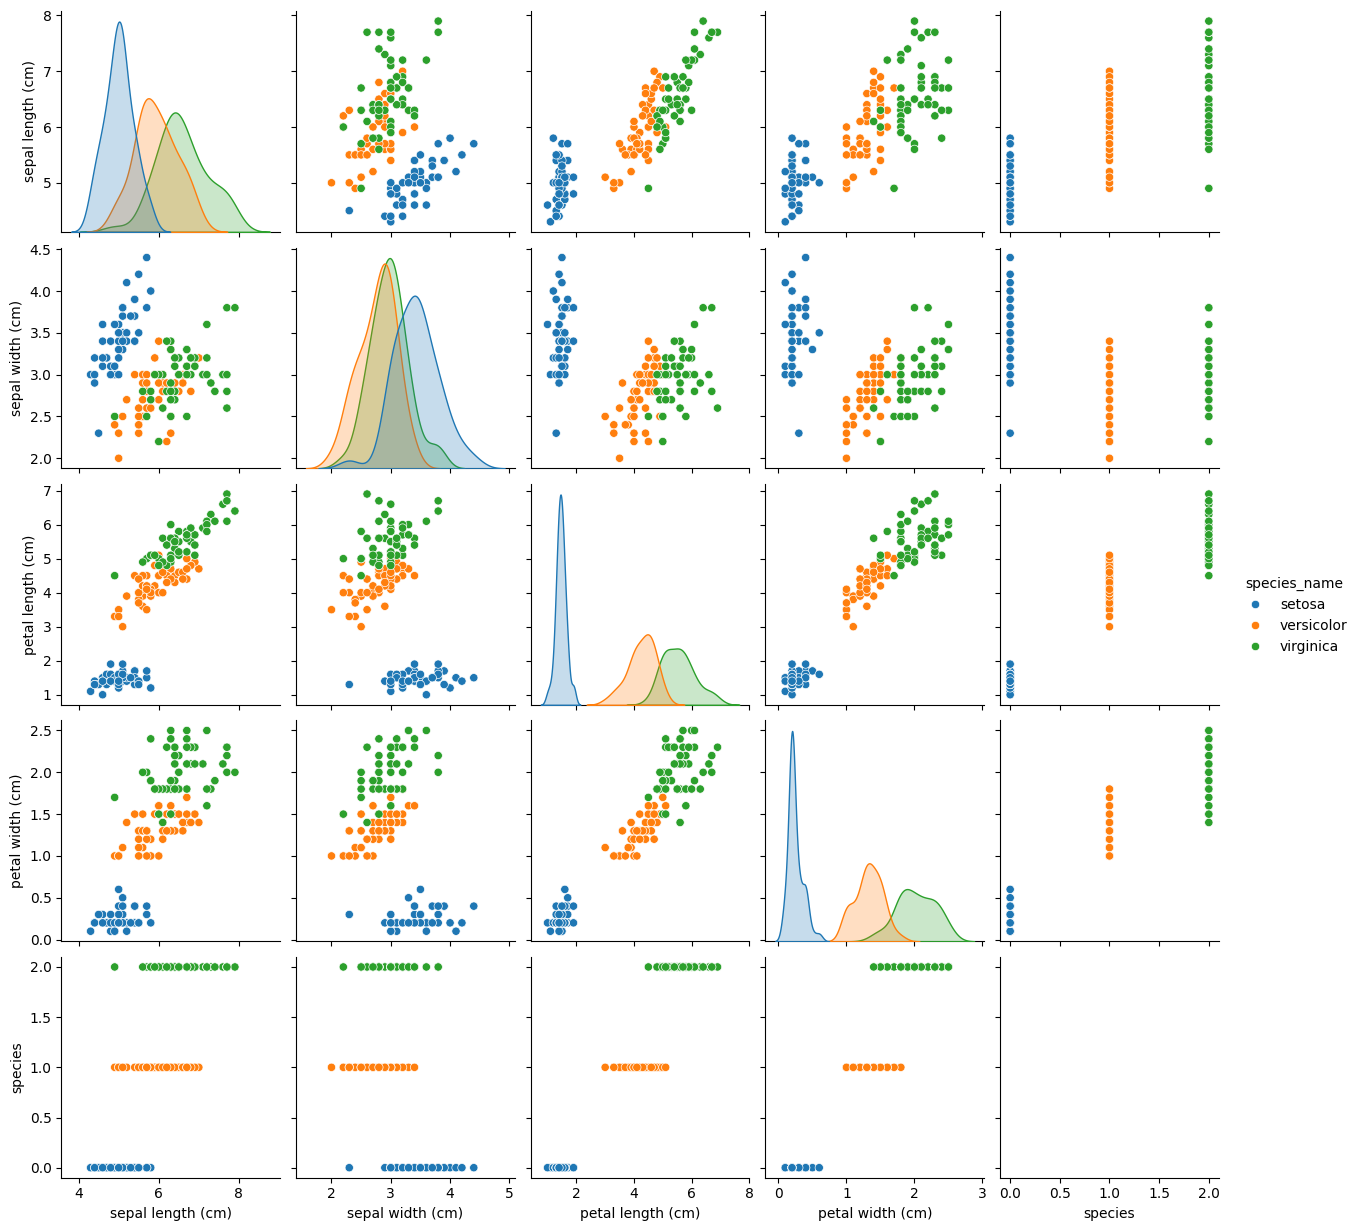

In [4]:
# Plot Pairplot for feature visualisation
sns.pairplot(iris_df, hue='species_name', diag_kind='kde')
plt.show()

#### Step 4: Split Dataset into Training and Test Sets
We use a **75/25 split** to ensure the model has enough training data. We also apply **stratified sampling** to maintain class balance in both sets.

___

💡 **Tip**: Setting `random_state` ensures reproducibility across different runs.
___

In [6]:
# Define feature names
features = iris.feature_names

# Split dataset into training and test sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(iris_df[features], iris_df['species'], test_size=0.25, random_state=42, stratify=iris_df['species'])

# Check test set class distribution
y_test.value_counts()

species
1    13
2    13
0    12
Name: count, dtype: int64

___
The `train_test_split` function in **scikit-learn** is used to **randomly split a dataset** into **training and testing sets**. This allow our machine learning models to **generalise well to unseen data**. You can find further info of this function at:

👉 [Official Documentation: train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
___

#### Step 5: Train kNN Model
The `KNeighborsClassifier` in **scikit-learn** is a simple yet powerful **machine learning algorithm** used for **classification tasks**.
- It classifies a new data point by looking at the **k nearest neighbours** in the dataset.
- The class with the most votes among the neighbours is the predicted class.
- Works well for small to medium-sized datasets, especially when patterns are **based on proximity**.

We initialise a kNN classifier with `k=5` and Euclidean distance as the metric.

___
💡 **Tip**: The choice of `k` affects model performance. A small `k` can make the model sensitive to noise, while a large `k` may oversimplify patterns.

Check more at: 👉 [k-Nearest Neighbours (kNN) Classification - Official Documentation](https://scikit-learn.org/stable/modules/neighbors.html#classification)
___

In [7]:
# Initialise KNN classifier with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

# Train the model on the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

#### Step 6: Model Evaluation
We test the model on the test set and calculate accuracy.
___
💡 **Tip**: Accuracy alone is not always a reliable metric, especially for imbalanced datasets.
___

In [8]:
# Predict the test set
y_pred = knn.predict(X_test)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier with k={k}: {accuracy:.2f}")

Accuracy of KNN classifier with k=5: 0.97


#### Step 7: Finding the Optimal k
Instead of assuming `k=5` is the best choice, we systematically test different values of `k` to observe how accuracy changes.

In [9]:
# Test different k values
lst_k = []
lst_acc = []

for k in range(3, 25, 2):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    lst_k.append(k)
    lst_acc.append(acc)
    print(f"Accuracy of KNN classifier with k={k}: {acc:.2f}")

Accuracy of KNN classifier with k=3: 0.97
Accuracy of KNN classifier with k=5: 0.97
Accuracy of KNN classifier with k=7: 0.95
Accuracy of KNN classifier with k=9: 0.97
Accuracy of KNN classifier with k=11: 0.97
Accuracy of KNN classifier with k=13: 0.95
Accuracy of KNN classifier with k=15: 0.95
Accuracy of KNN classifier with k=17: 0.95
Accuracy of KNN classifier with k=19: 0.95
Accuracy of KNN classifier with k=21: 0.95
Accuracy of KNN classifier with k=23: 0.95


#### Step 8: Plot Accuracy vs. k Values
We visualise the accuracy values of `k` to find the optimal choice.
___
💡 **Tip**: Look for the `k` value where accuracy stablises or peaks.
___


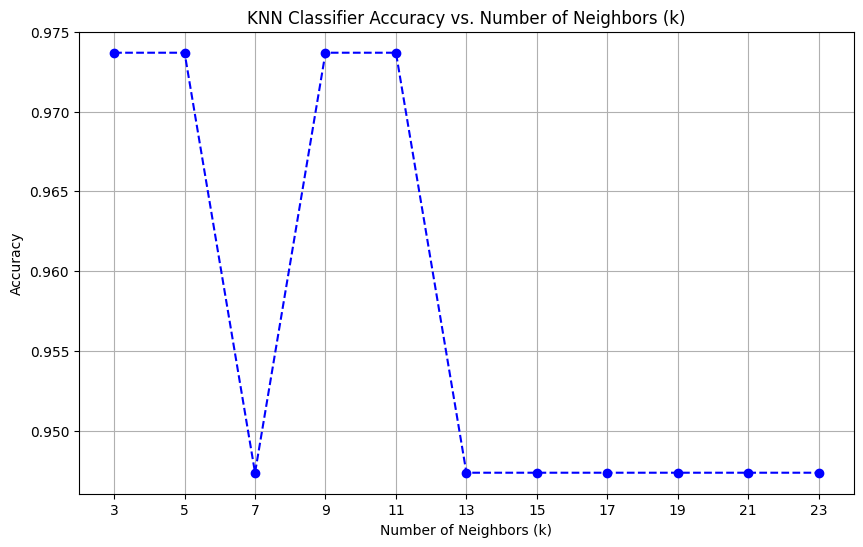

In [11]:
# Plot accuracy vs. k values
plt.figure(figsize=(10, 6))
plt.plot(lst_k, lst_acc, marker='o', linestyle='--', color='b')

# Ensure x-axis only shows integer values as k can only be integer
plt.xticks(lst_k)

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy vs. Number of Neighbors (k)')
plt.grid()
plt.show()

The above graph shows that the best model (based on accuracy) is achieved at `k=3`.

#### Summary & Next Steps
**Key Takeaways**:
- We used the **Iris dataset** to train a kNN classifier.
- We split the data into **training (75%)** and **test (25%)** sets using **stratified sampling**.
- We searched for the **optimal k value** using accuracy trends.

**Next Steps**:
- Apply kNN to a different dataset.
- Experiment with **feature scaling** to see how it affects distance calculations.
- Try different **distance metrics** like Manhattan or Minkoski distance.